In [2]:
import random as rm
from scipy.stats import norm
import seaborn as sns
import numpy as np

In [26]:
def reset(s):
  s=[[] ,[], [], [], []]
def dropball(s, b, n):
  s[n].insert(0,b)
def turn(s, b, z=1):
  for i in range(z):
    for i in range(5):
      if len(s[i]) == 2 and (b in s[i]):
        dropball(s,b,i)
        return
    for i in range(5):
      if len(s[i]) == 2:
        dropball(s,b,i)
        return
    for i in range(5):
      if len(s[i]) == 0:
        dropball(s,b,i)
        return
    for i in range(5):
      if len(s[i])==1 and (b not in s[i]):
        dropball(s,b,i)
        return
    for i in range(5):
      if len(s[i])<3:
        dropball(s,b,i)
        return
def randturn(s, b, z=1):
  for i in range(z):
    while True:
      x=rm.randint(0,4)
      if len(s[x])<3:
        dropball(s,b,x)
        break
  display(s)
def display(s):
  for i in range(3):
    for j in range(5):
      try:
        print(s[j][i-3], end = " ")
      except:
        print("x", end = " ")
    print()
  print()
def checkwin(s, a, b):
  ca=0
  cb=0
  for i in range(5):
    if len(s[i])==3:
      if s[i][0]==a and (a in s[i][1:]):
        ca+=1
      elif s[i][0]==b and (b in s[i][1:]):
        cb+=1
  print("a: ",ca," b: ",cb)
  if ca>=3:
    print(a, " team wins!")
    return 1
  elif cb>=3:
    print(b, " team wins!")
    return 1
  l=0
  for i in range(5):
    if len(s[i])==3:
      l+=1
  if l==5:
    print("No clear winner")
    return 1
  return 0
data_normal = norm.rvs(size=10000,loc=0,scale=0.75)
pdf = (norm.pdf(data_normal, loc=0, scale=0.75))
pdff = pdf/np.sum(pdf)
2**((np.random.choice(a= data_normal, p=pdff))/2)
def play(s, a, b):
  d=0
  while True:
    v = 4**((np.random.choice(a= data_normal, p=pdff))/2)
    if v < 1:
      z2 = round((1/v)+d)
      d = (1/v)-z2 + d
      z1 = 1
    else:
      z1 = round(v+d)
      d = v - z1 + d
      z2 = 1
    print("The speed of opponent is", z2)
    print(" The speed of ours is", z1)
    randturn(s, b, z2)
    o=checkwin(s, a, b)
    if o == 1:
      return
    turn(s, a, z1)
    display(s)
    o=checkwin(s, a, b)
    if o == 1:
      return
# Here the parameters are as follows:-
# s: The silo matrix
# a: The number(ball) representing our team
# b: The number(ball) representing opponent team
# z1: The number of balls the robot puts in any silo in one unit time by our team
# z2: The number of balls the robot puts in any silo in one unit time by opponent team


In [27]:
#Lets assume i am team 1 and opponent is team 0.

In [28]:
s=[[] ,[], [], [], []]
play(s, 1, 0)

The speed of opponent is 1
 The speed of ours is 1
x x x x x 
x x x x x 
x x x x 0 

a:  0  b:  0
x x x x x 
x x x x x 
1 x x x 0 

a:  0  b:  0
The speed of opponent is 1
 The speed of ours is 1
x x x x x 
x x x x 0 
1 x x x 0 

a:  0  b:  0
x x x x 1 
x x x x 0 
1 x x x 0 

a:  0  b:  0
The speed of opponent is 2
 The speed of ours is 1
0 x x x 1 
0 x x x 0 
1 x x x 0 

a:  0  b:  1
0 x x x 1 
0 x x x 0 
1 1 x x 0 

a:  0  b:  1
The speed of opponent is 1
 The speed of ours is 1
0 x x x 1 
0 x x x 0 
1 1 0 x 0 

a:  0  b:  1
0 x x x 1 
0 x x x 0 
1 1 0 1 0 

a:  0  b:  1
The speed of opponent is 2
 The speed of ours is 1
0 x x x 1 
0 0 0 x 0 
1 1 0 1 0 

a:  0  b:  1
0 1 x x 1 
0 0 0 x 0 
1 1 0 1 0 

a:  1  b:  1
The speed of opponent is 1
 The speed of ours is 1
0 1 0 x 1 
0 0 0 x 0 
1 1 0 1 0 

a:  1  b:  2
0 1 0 x 1 
0 0 0 1 0 
1 1 0 1 0 

a:  1  b:  2
The speed of opponent is 1
 The speed of ours is 1
0 1 0 0 1 
0 0 0 1 0 
1 1 0 1 0 

a:  1  b:  2
No clear winner


In [29]:
data_normal = norm.rvs(size=10000,loc=0,scale=0.75)
print(max(data_normal))
print(min(data_normal))


2.9133946774940696
-3.062398585875993


<ipython-input-30-0cf4c5190de7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_normal,


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

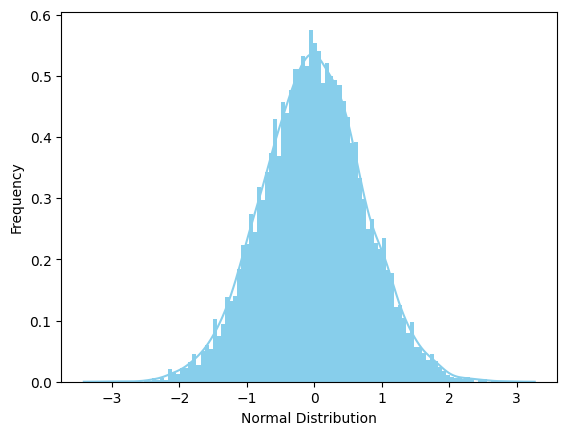

In [30]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')


In [31]:
pdf = (norm.pdf(data_normal, loc=0, scale=0.75))
pdff = pdf/np.sum(pdf)
2**((np.random.choice(a= data_normal, p=pdff))/2)

0.9231264213201756